In this project I will be working on a data from one of the Kaggle Challenges,

## **Stay Alert! The Ford Challenge**
-----------

<center><img src = "https://www.linkpicture.com/q/Road_1.png"></center>

### **Dataset Description**
---------------
       The data for this project shows the results of a number of "trials", each one representing about 2 minutes of sequential data that are recorded every 100 ms during a driving session on the road or in a driving simulator.  The trials are samples from some 100 drivers of both genders, and of different ages and ethnic backgrounds. The files are structured as follows:
         
       The first column is the Trial ID - each period of around 2 minutes of sequential data has a unique trial ID. For instance, the first 1210 observations represent sequential observations every 100ms, and therefore all have the same trial ID
        The second column is the observation number - this is a sequentially increasing number within one trial ID  
        The third column has a value X for each row where    
               X = 1     if the driver is alert  
               X = 0     if the driver is not alert   
        The next 8 columns with headers P1, P2 , …….., P8 represent physiological data;  
        The next 11 columns with headers E1, E2, …….., E11 represent environmental data;  
        The next 11 columns with headers V1, V2, …….., V11 represent vehicular data;    


### **Problem Statement**
------

QUESTION : Driving while distracted, fatigued or drowsy may lead to accidents. Activities that divert the driver's attention from the road ahead, such as engaging in a conversation with other passengers in the car, making or receiving phone calls sending or receiving text messages, eating while driving or events outside the car may cause driver distraction. Fatigue and drowsiness can result from driving long hours or from lack of sleep.    
        
The objective of this challenge is to design a detector/classifier that will detect whether the driver is alert or not alert employing any combination of vehicular, environmental and driver physiological data that are acquired while driving.        

*Importing the required libraries*

In [2]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

# to avoid the red text boxes while getting an output
import warnings
warnings.filterwarnings('ignore')

# to display all columns
pd.set_option('display.max_columns',None)

*Reading in the training and testing data*

In [3]:
train_df = pd.read_csv(r"fordTrain.csv",header=0)
test_df = pd.read_csv(r"fordTest.csv",header=0)

*Creating a copy of the dataframe for easy manipulations of the data*

In [4]:
train_df_rev = pd.DataFrame.copy(train_df)
test_df_rev = pd.DataFrame.copy(test_df)

*Checking the shapes of the training and the testing data*

In [5]:
print(train_df_rev.shape)
print()
print(test_df_rev.shape)

(604329, 33)

(120840, 33)


In [6]:
train_df_rev

,TrialID,ObsNum,IsAlert,P1,P2,P3,P4,P5,P6,P7,P8,E1,E2,E3,E4,E5,E6,E7,E8,E9,E10,E11,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11
0,0,0,0,34.7406,9.84593,1400,42.8571,0.290601,572,104.8950,0,0.000,0.00,1,-20,0.015875,324,1,1,1,57,0.0,101.96,0.175,752,5.99375,0,2005,0,13.4,0,4,14.8004
1,0,1,0,34.4215,13.41120,1400,42.8571,0.290601,572,104.8950,0,0.000,0.00,1,-20,0.015875,324,1,1,1,57,0.0,101.98,0.455,752,5.99375,0,2007,0,13.4,0,4,14.7729
2,0,2,0,34.3447,15.18520,1400,42.8571,0.290601,576,104.1670,0,0.000,0.00,1,-20,0.015875,324,1,1,1,57,0.0,101.97,0.280,752,5.99375,0,2011,0,13.4,0,4,14.7736
3,0,3,0,34.3421,8.84696,1400,42.8571,0.290601,576,104.1670,0,0.000,0.00,1,-20,0.015875,324,1,1,1,57,0.0,101.99,0.070,752,5.99375,0,2015,0,13.4,0,4,14.7667
4,0,4,0,34.3322,14.69940,1400,42.8571,0.290601,576,104.1670,0,0.000,0.00,1,-20,0.015875,324,1,1,1,57,0.0,102.07,0.175,752,5.99375,0,2017,0,13.4,0,4,14.7757
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
604324,510,1194,1,32.0051,10.13240,800,75.0000,0.081731,680,88.2353,0,17.807,222.11,0,0,0.016379,322,2,2,1,64,0.0,91.51,0.280,240,3.01875,0,1801,0,30.4,0,4,15.8113
604325,510,1195,1,32.0393,12.45040,800,75.0000,0.081731,680,88.2353,0,17.807,222.11,0,0,0.016379,322,2,2,1,64,0.0,91.51,0.280,240,3.01875,0,1801,0,30.4,0,4,15.8018
604326,510,1196,1,32.0762,10.06180,800,75.0000,0.081731,680,88.2353,0,17.807,222.11,0,0,0.016379,322,2,2,1,64,0.0,91.56,0.175,240,3.01875,0,1800,0,31.3,0,4,15.8120
604327,510,1197,1,32.1154,17.84500,800,75.0000,0.081731,680,88.2353,0,17.807,222.11,0,0,0.016379,322,2,2,1,64,0.0,91.56,0.175,240,3.01875,0,1800,0,31.3,0,4,15.8270


In [7]:
test_df_rev

,TrialID,ObsNum,IsAlert,P1,P2,P3,P4,P5,P6,P7,P8,E1,E2,E3,E4,E5,E6,E7,E8,E9,E10,E11,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11
0,0,0,?,38.4294,10.94350,1000,60.0000,0.302277,508,118.1100,0,0.000,0.000,4,4,0.015434,328,1,1,1,64,0.0,108.57,0.00,255,4.50625,0,2127,0,17.6,0,4,16.1937
1,0,1,?,38.3609,15.32120,1000,60.0000,0.302277,508,118.1100,0,0.000,0.000,4,4,0.015434,328,1,1,1,64,0.0,108.57,0.00,255,4.50625,0,2127,0,17.6,0,4,16.1744
2,0,2,?,38.2342,11.51400,1000,60.0000,0.302277,508,118.1100,0,0.000,0.000,4,8,0.015938,328,1,1,1,65,0.0,108.65,0.07,255,4.50625,0,2131,0,17.6,0,4,16.1602
3,0,3,?,37.9304,12.26150,1000,60.0000,0.302277,508,118.1100,0,0.000,0.000,4,8,0.015938,328,1,1,1,65,0.0,108.65,0.07,255,4.50625,0,2131,0,17.6,0,4,16.1725
4,0,4,?,37.8085,12.36660,1000,60.0000,0.302277,504,119.0480,0,0.000,0.000,4,8,0.015938,328,1,1,1,65,0.0,108.57,0.00,255,4.50625,0,2136,0,17.6,0,4,16.1459
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120835,99,1206,?,37.3798,17.40260,892,67.2646,0.131030,752,79.7872,0,0.068,214.033,0,0,0.015875,366,0,0,1,71,0.0,0.00,-0.07,255,0.00000,0,658,0,0.0,0,1,16.6850
120836,99,1207,?,37.1653,5.37419,892,67.2646,0.131030,752,79.7872,0,0.068,214.033,0,0,0.015875,366,0,0,1,71,0.0,0.00,-0.07,255,0.00000,0,657,0,0.0,0,1,16.6840
120837,99,1208,?,36.9131,9.26657,892,67.2646,0.131030,752,79.7872,0,0.068,214.033,0,0,0.015875,366,0,0,1,71,0.0,0.00,-0.07,255,0.00000,0,655,0,0.0,0,1,16.6487
120838,99,1209,?,36.6297,10.41710,892,67.2646,0.131030,752,79.7872,0,0.068,214.033,0,0,0.015875,366,0,0,1,71,0.0,0.00,-0.07,240,0.00000,0,657,0,0.0,0,1,16.6314


### **Exploratory Data Analysis**

In [8]:
%matplotlib inline
#The following settings will improve the default style and font sizes for our charts
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (10, 6)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

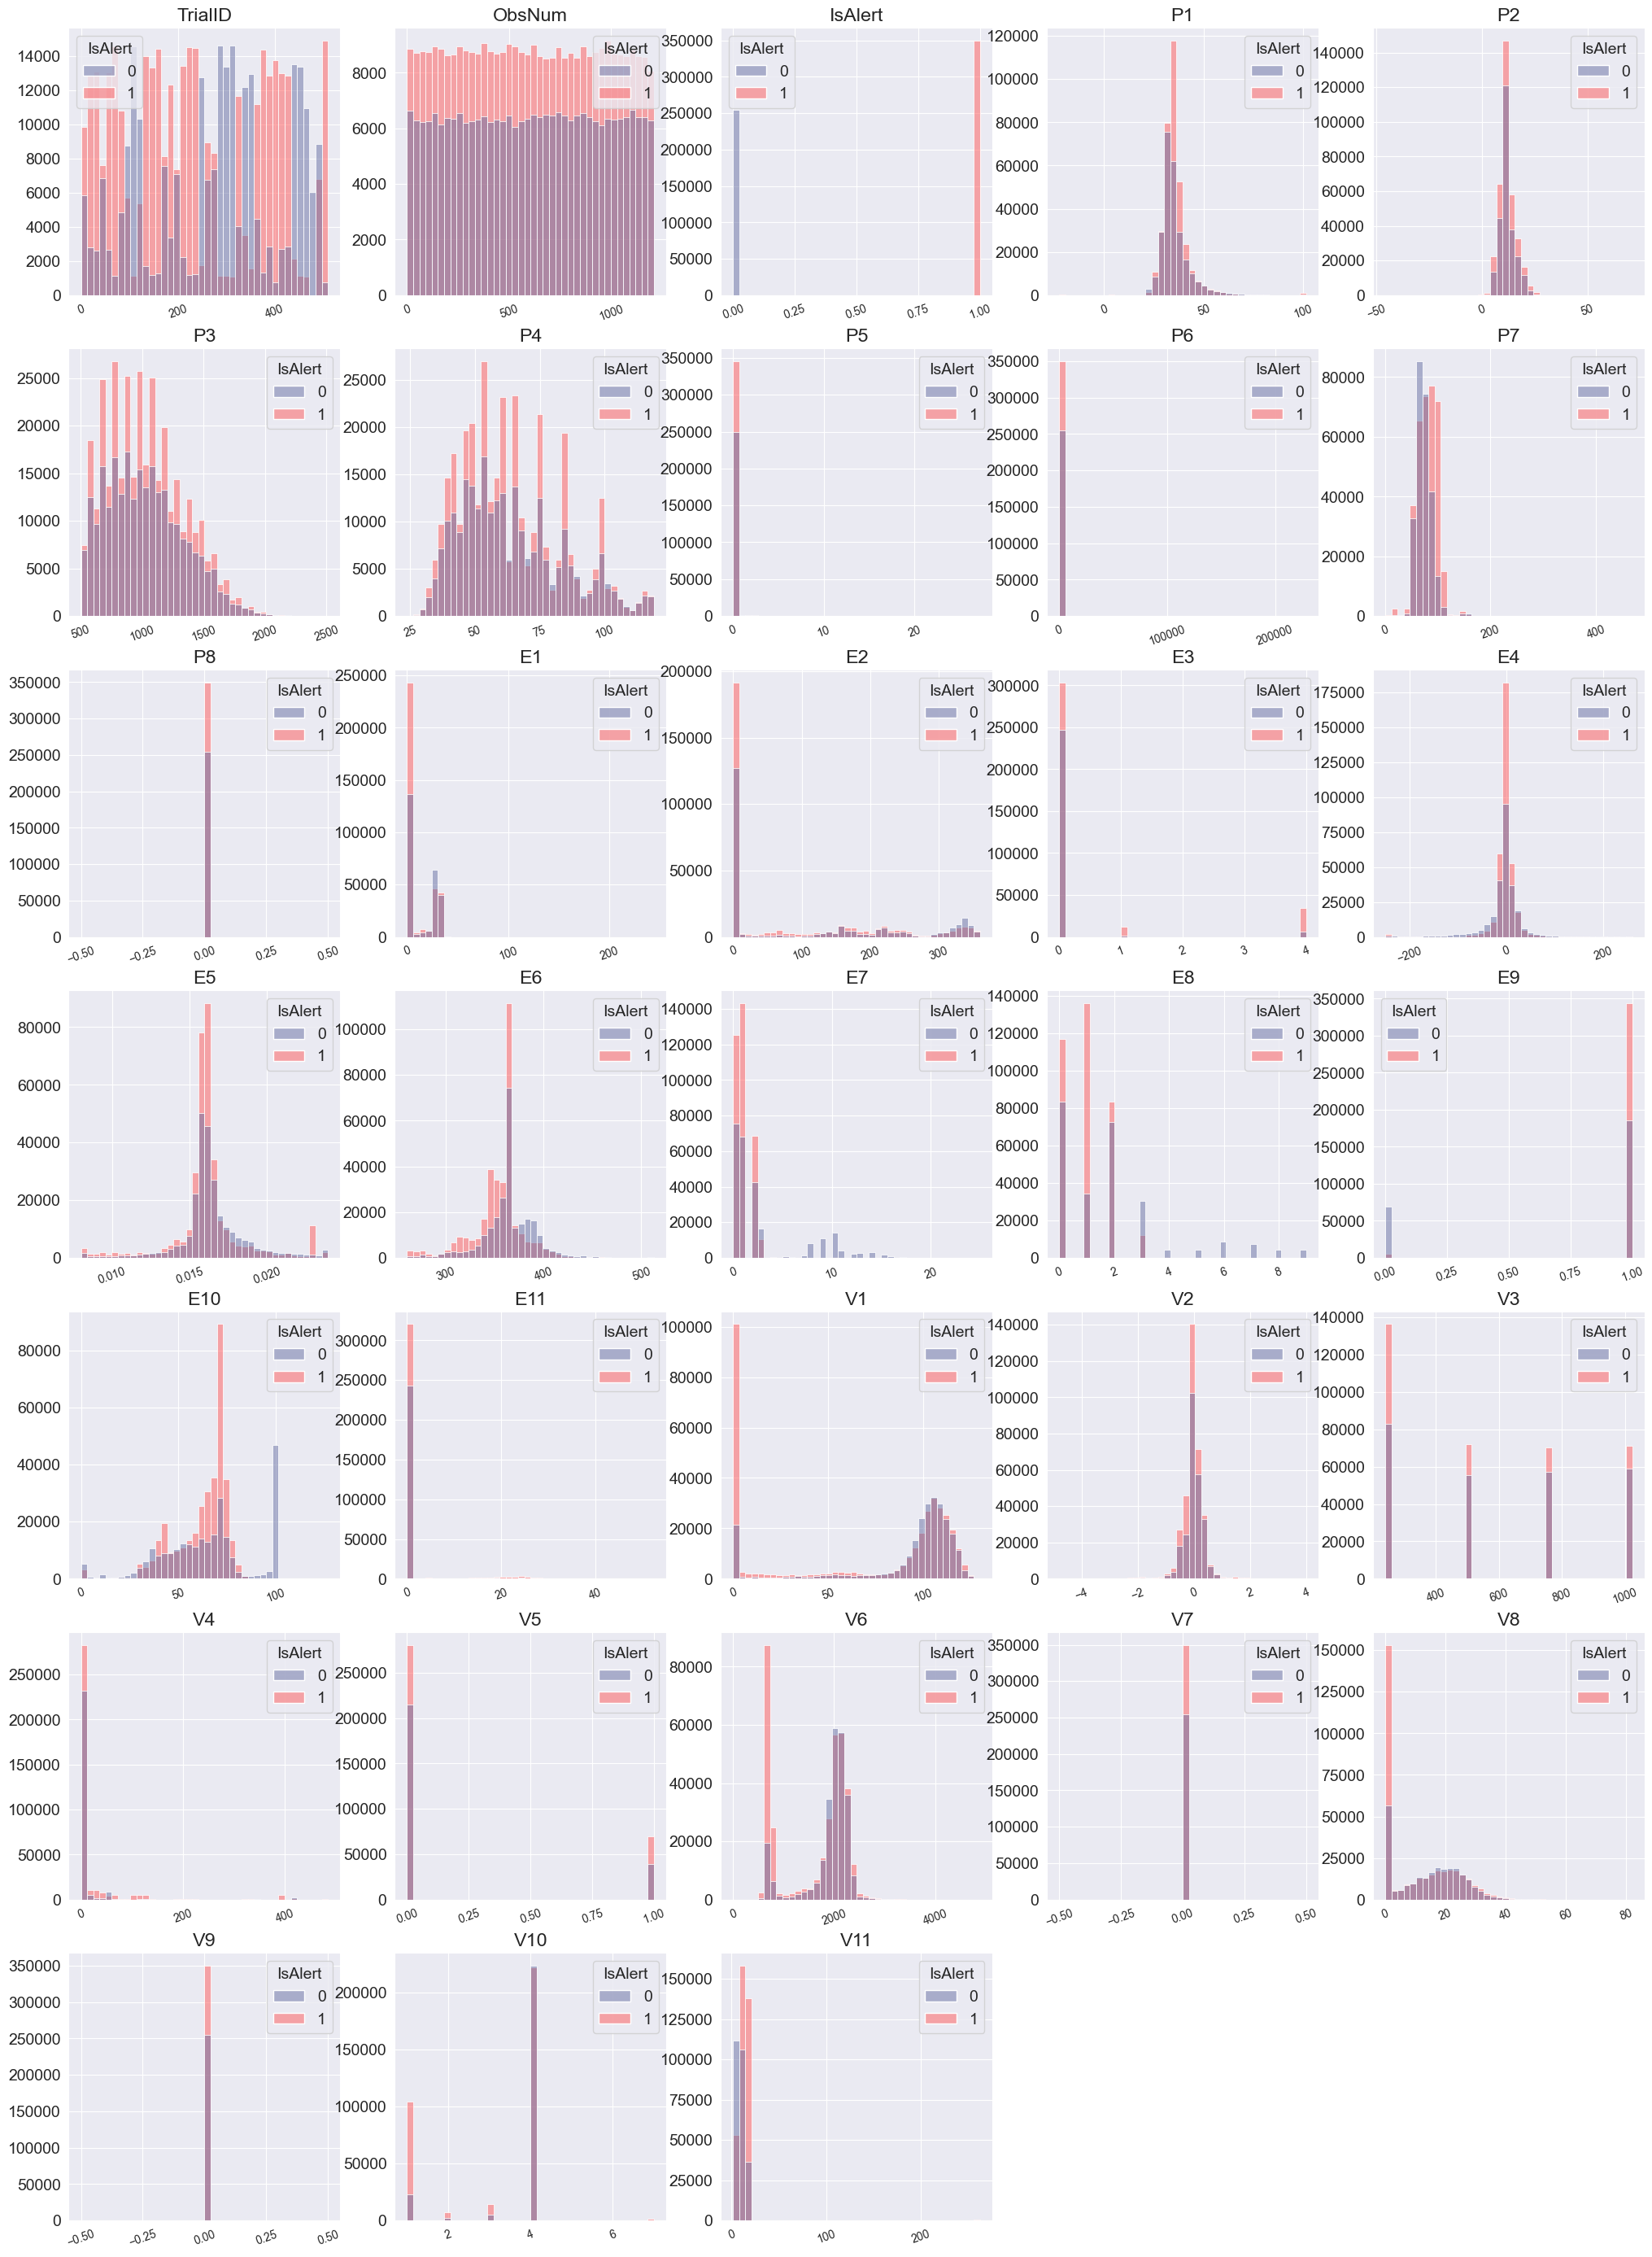

In [9]:
# 0 represent the driver is not alert
# 1 represent the driver is alert
numerical = [feature for feature in train_df_rev.columns if train_df_rev[feature].dtype in ['int64', 'float64']]
df = train_df_rev[numerical]

fig = plt.figure(figsize = (25, 35))

i=1
for n in df.columns:
    plt.subplot(7, 5, i)
    ax = sns.histplot(x = train_df_rev[n],hue = train_df_rev['IsAlert'], palette = ['#676FA3', '#FF5959'], bins = 40)
    ax.set(xlabel = None, ylabel = None)
    plt.title(str(n), loc = 'center')
    plt.xticks(rotation = 20, fontsize = 10)
    i += 1

*As with any real world data, the data is skewed*

In [10]:
# Checking the basic information of the dataset
print(train_df_rev.info())
print()
print(test_df_rev.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 604329 entries, 0 to 604328
Data columns (total 33 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   TrialID  604329 non-null  int64  
 1   ObsNum   604329 non-null  int64  
 2   IsAlert  604329 non-null  int64  
 3   P1       604329 non-null  float64
 4   P2       604329 non-null  float64
 5   P3       604329 non-null  int64  
 6   P4       604329 non-null  float64
 7   P5       604329 non-null  float64
 8   P6       604329 non-null  int64  
 9   P7       604329 non-null  float64
 10  P8       604329 non-null  int64  
 11  E1       604329 non-null  float64
 12  E2       604329 non-null  float64
 13  E3       604329 non-null  int64  
 14  E4       604329 non-null  int64  
 15  E5       604329 non-null  float64
 16  E6       604329 non-null  int64  
 17  E7       604329 non-null  int64  
 18  E8       604329 non-null  int64  
 19  E9       604329 non-null  int64  
 20  E10      604329 non-null  

In [11]:
# Checking the null values in the dataset
print(train_df_rev.isnull().sum())
print()
print(test_df_rev.isnull().sum())

TrialID    0
ObsNum     0
IsAlert    0
P1         0
P2         0
P3         0
P4         0
P5         0
P6         0
P7         0
P8         0
E1         0
E2         0
E3         0
E4         0
E5         0
E6         0
E7         0
E8         0
E9         0
E10        0
E11        0
V1         0
V2         0
V3         0
V4         0
V5         0
V6         0
V7         0
V8         0
V9         0
V10        0
V11        0
dtype: int64

TrialID    0
ObsNum     0
IsAlert    0
P1         0
P2         0
P3         0
P4         0
P5         0
P6         0
P7         0
P8         0
E1         0
E2         0
E3         0
E4         0
E5         0
E6         0
E7         0
E8         0
E9         0
E10        0
E11        0
V1         0
V2         0
V3         0
V4         0
V5         0
V6         0
V7         0
V8         0
V9         0
V10        0
V11        0
dtype: int64


As we can see there are no null values in the data.

In [12]:
# Statistical Descriprtion of the dataset
train_df_rev.describe(include='all')

,TrialID,ObsNum,IsAlert,P1,P2,P3,P4,P5,P6,P7,P8,E1,E2,E3,E4,E5,E6,E7,E8,E9,E10,E11,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11
count,604329.000000,604329.000000,604329.000000,604329.000000,604329.000000,604329.000000,604329.000000,604329.000000,604329.000000,604329.000000,604329.0,604329.000000,604329.000000,604329.000000,604329.000000,604329.000000,604329.000000,604329.000000,604329.000000,604329.000000,604329.000000,604329.000000,604329.000000,604329.000000,604329.000000,604329.000000,604329.000000,604329.000000,604329.0,604329.000000,604329.0,604329.000000,604329.000000
mean,250.167657,603.841765,0.578799,35.449020,11.996525,1026.671035,64.061965,0.178923,845.384610,77.887628,0.0,10.512332,102.790045,0.290565,-4.230136,0.016262,358.674738,1.757296,1.383058,0.876787,63.311256,1.315265,76.965412,-0.037710,573.786433,19.961030,0.179814,1715.688383,0.0,12.710354,0.0,3.312257,11.668277
std,145.446164,348.931601,0.493752,7.484629,3.760292,309.277877,19.755950,0.372309,2505.335141,18.577930,0.0,14.049071,127.258629,1.006162,35.508596,0.002304,27.399973,2.854852,1.608807,0.328681,18.891029,5.247204,44.387031,0.403896,298.412888,63.269456,0.384033,618.176470,0.0,11.532085,0.0,1.243586,9.934423
min,0.000000,0.000000,0.000000,-22.481200,-45.629200,504.000000,23.885300,0.038920,128.000000,0.262224,0.0,0.000000,0.000000,0.000000,-250.000000,0.008000,260.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-4.795000,240.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,1.000000,1.676730
25%,125.000000,302.000000,0.000000,31.758100,9.903540,792.000000,49.180300,0.092110,668.000000,66.666700,0.0,0.000000,0.000000,0.000000,-8.000000,0.015686,348.000000,0.000000,0.000000,1.000000,52.000000,0.000000,41.930000,-0.175000,255.000000,1.487500,0.000000,1259.000000,0.0,0.000000,0.0,3.000000,7.947680
50%,250.000000,604.000000,1.000000,34.145100,11.400400,1000.000000,60.000000,0.105083,800.000000,75.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.016001,365.000000,1.000000,1.000000,1.000000,67.000000,0.000000,100.400000,0.000000,511.000000,3.018750,0.000000,1994.000000,0.0,12.800000,0.0,4.000000,10.772600
75%,374.000000,906.000000,1.000000,37.311900,13.644200,1220.000000,75.757600,0.138814,900.000000,89.820400,0.0,28.240000,211.584000,0.000000,6.000000,0.016694,367.000000,2.000000,2.000000,1.000000,73.000000,0.000000,108.500000,0.070000,767.000000,7.481250,0.000000,2146.000000,0.0,21.900000,0.0,4.000000,15.270900
max,510.000000,1210.000000,1.000000,101.351000,71.173700,2512.000000,119.048000,27.202200,228812.000000,468.750000,0.0,243.991000,359.995000,4.000000,260.000000,0.023939,513.000000,25.000000,9.000000,1.000000,127.000000,52.400000,129.700000,3.990000,1023.000000,484.488000,1.000000,4892.000000,0.0,82.100000,0.0,7.000000,262.534000


In [13]:
test_df_rev.describe(include='all')

,TrialID,ObsNum,IsAlert,P1,P2,P3,P4,P5,P6,P7,P8,E1,E2,E3,E4,E5,E6,E7,E8,E9,E10,E11,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11
count,120840.000000,120840.000000,120840,120840.000000,120840.000000,120840.000000,120840.000000,120840.000000,120840.000000,120840.000000,120840.0,120840.000000,120840.000000,120840.000000,120840.000000,120840.000000,120840.000000,120840.000000,120840.000000,120840.000000,120840.000000,120840.000000,120840.000000,120840.000000,120840.000000,120840.000000,120840.000000,120840.000000,120840.0,120840.000000,120840.0,120840.000000,120840.000000
unique,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,?,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,120840,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,49.496491,603.711635,NaN,35.450222,12.008451,1026.668355,64.148812,0.122339,707.701456,86.174020,0.0,10.648237,98.202840,0.191154,-0.572095,0.015950,347.686395,1.358284,1.614176,0.868032,68.655238,1.770682,78.696121,-0.036024,562.097443,32.215433,0.179394,1732.128037,0.0,12.838320,0.0,3.378633,13.899704
std,28.865733,348.856410,NaN,3.303869,4.351161,310.874514,19.995102,0.113811,90.398496,11.024309,0.0,13.950893,125.644623,0.776454,26.663652,0.002584,47.971289,2.376400,1.537636,0.338457,17.456849,6.030855,42.534170,0.392249,300.358571,97.893439,0.383684,594.847283,0.0,12.315979,0.0,1.213857,1.504704
min,0.000000,0.000000,NaN,17.776300,-25.911800,504.000000,25.996500,0.040217,468.000000,49.342100,0.0,0.000000,0.000000,0.000000,-250.000000,0.008000,260.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-3.605000,240.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,1.000000,9.538220
25%,24.000000,302.000000,NaN,33.456300,9.600658,788.000000,49.180300,0.089515,636.000000,76.923100,0.0,0.000000,0.000000,0.000000,-6.000000,0.014804,303.000000,0.000000,0.000000,1.000000,65.000000,0.000000,56.540000,-0.175000,255.000000,1.487500,0.000000,1489.000000,0.0,0.000000,0.0,4.000000,12.775275
50%,49.000000,604.000000,NaN,34.877800,11.288900,1000.000000,60.000000,0.101191,700.000000,85.714300,0.0,0.000000,0.000000,0.000000,0.000000,0.015875,356.000000,1.000000,2.000000,1.000000,71.000000,0.000000,101.800000,0.000000,497.000000,3.018750,0.000000,2015.000000,0.0,12.300000,0.0,4.000000,13.470900
75%,74.000000,906.000000,NaN,36.862200,13.542925,1220.000000,76.142100,0.115462,780.000000,94.339600,0.0,28.541000,211.328000,0.000000,6.000000,0.017387,367.000000,2.000000,3.000000,1.000000,77.000000,0.000000,107.650000,0.070000,767.000000,5.993750,0.000000,2123.000000,0.0,22.800000,0.0,4.000000,15.223900


In [14]:
# Checking the datatypes of the columns

print(train_df_rev.dtypes)
print()
print(test_df_rev.dtypes)

TrialID      int64
ObsNum       int64
IsAlert      int64
P1         float64
P2         float64
P3           int64
P4         float64
P5         float64
P6           int64
P7         float64
P8           int64
E1         float64
E2         float64
E3           int64
E4           int64
E5         float64
E6           int64
E7           int64
E8           int64
E9           int64
E10          int64
E11        float64
V1         float64
V2         float64
V3           int64
V4         float64
V5           int64
V6           int64
V7           int64
V8         float64
V9           int64
V10          int64
V11        float64
dtype: object

TrialID      int64
ObsNum       int64
IsAlert     object
P1         float64
P2         float64
P3           int64
P4         float64
P5         float64
P6           int64
P7         float64
P8           int64
E1         float64
E2         float64
E3           int64
E4           int64
E5         float64
E6           int64
E7           int64
E8           int

Most of the columns are of int or float data type.

### *Feature selection*

In [15]:
# Dropping off the unwanted columns
train_df_rev.drop(columns=['TrialID','ObsNum','V7','V9','P8'],inplace=True)
test_df_rev.drop(columns=['TrialID','IsAlert','ObsNum','V7','V9','P8'],inplace=True)

# Columns V7, V9, and P8 contain all the values as '0'
# From the test data the 'Is Alert' column has to be removed as it contains only '????'

In [16]:
# Checking to see if the columns have been removed
print(train_df_rev.shape)
print()
print(test_df_rev.shape)

(604329, 28)

(120840, 27)


In [17]:
train_df_rev

,IsAlert,P1,P2,P3,P4,P5,P6,P7,E1,E2,E3,E4,E5,E6,E7,E8,E9,E10,E11,V1,V2,V3,V4,V5,V6,V8,V10,V11
0,0,34.7406,9.84593,1400,42.8571,0.290601,572,104.8950,0.000,0.00,1,-20,0.015875,324,1,1,1,57,0.0,101.96,0.175,752,5.99375,0,2005,13.4,4,14.8004
1,0,34.4215,13.41120,1400,42.8571,0.290601,572,104.8950,0.000,0.00,1,-20,0.015875,324,1,1,1,57,0.0,101.98,0.455,752,5.99375,0,2007,13.4,4,14.7729
2,0,34.3447,15.18520,1400,42.8571,0.290601,576,104.1670,0.000,0.00,1,-20,0.015875,324,1,1,1,57,0.0,101.97,0.280,752,5.99375,0,2011,13.4,4,14.7736
3,0,34.3421,8.84696,1400,42.8571,0.290601,576,104.1670,0.000,0.00,1,-20,0.015875,324,1,1,1,57,0.0,101.99,0.070,752,5.99375,0,2015,13.4,4,14.7667
4,0,34.3322,14.69940,1400,42.8571,0.290601,576,104.1670,0.000,0.00,1,-20,0.015875,324,1,1,1,57,0.0,102.07,0.175,752,5.99375,0,2017,13.4,4,14.7757
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
604324,1,32.0051,10.13240,800,75.0000,0.081731,680,88.2353,17.807,222.11,0,0,0.016379,322,2,2,1,64,0.0,91.51,0.280,240,3.01875,0,1801,30.4,4,15.8113
604325,1,32.0393,12.45040,800,75.0000,0.081731,680,88.2353,17.807,222.11,0,0,0.016379,322,2,2,1,64,0.0,91.51,0.280,240,3.01875,0,1801,30.4,4,15.8018
604326,1,32.0762,10.06180,800,75.0000,0.081731,680,88.2353,17.807,222.11,0,0,0.016379,322,2,2,1,64,0.0,91.56,0.175,240,3.01875,0,1800,31.3,4,15.8120
604327,1,32.1154,17.84500,800,75.0000,0.081731,680,88.2353,17.807,222.11,0,0,0.016379,322,2,2,1,64,0.0,91.56,0.175,240,3.01875,0,1800,31.3,4,15.8270


In [18]:
test_df_rev

,P1,P2,P3,P4,P5,P6,P7,E1,E2,E3,E4,E5,E6,E7,E8,E9,E10,E11,V1,V2,V3,V4,V5,V6,V8,V10,V11
0,38.4294,10.94350,1000,60.0000,0.302277,508,118.1100,0.000,0.000,4,4,0.015434,328,1,1,1,64,0.0,108.57,0.00,255,4.50625,0,2127,17.6,4,16.1937
1,38.3609,15.32120,1000,60.0000,0.302277,508,118.1100,0.000,0.000,4,4,0.015434,328,1,1,1,64,0.0,108.57,0.00,255,4.50625,0,2127,17.6,4,16.1744
2,38.2342,11.51400,1000,60.0000,0.302277,508,118.1100,0.000,0.000,4,8,0.015938,328,1,1,1,65,0.0,108.65,0.07,255,4.50625,0,2131,17.6,4,16.1602
3,37.9304,12.26150,1000,60.0000,0.302277,508,118.1100,0.000,0.000,4,8,0.015938,328,1,1,1,65,0.0,108.65,0.07,255,4.50625,0,2131,17.6,4,16.1725
4,37.8085,12.36660,1000,60.0000,0.302277,504,119.0480,0.000,0.000,4,8,0.015938,328,1,1,1,65,0.0,108.57,0.00,255,4.50625,0,2136,17.6,4,16.1459
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120835,37.3798,17.40260,892,67.2646,0.131030,752,79.7872,0.068,214.033,0,0,0.015875,366,0,0,1,71,0.0,0.00,-0.07,255,0.00000,0,658,0.0,1,16.6850
120836,37.1653,5.37419,892,67.2646,0.131030,752,79.7872,0.068,214.033,0,0,0.015875,366,0,0,1,71,0.0,0.00,-0.07,255,0.00000,0,657,0.0,1,16.6840
120837,36.9131,9.26657,892,67.2646,0.131030,752,79.7872,0.068,214.033,0,0,0.015875,366,0,0,1,71,0.0,0.00,-0.07,255,0.00000,0,655,0.0,1,16.6487
120838,36.6297,10.41710,892,67.2646,0.131030,752,79.7872,0.068,214.033,0,0,0.015875,366,0,0,1,71,0.0,0.00,-0.07,240,0.00000,0,657,0.0,1,16.6314


### *Creating X and Y from the Training Data*

*Splitting the training data into training and validation data*

**X -- Independent Variable**  
**Y -- Dependent Variable (Target Variable)** ("Is Alert")

In [19]:
X = train_df_rev.values[:,1:]
Y = train_df_rev.values[:,0]

In [20]:
# Checking the shapes of the splits
print(X.shape)
print(Y.shape)

(604329, 27)
(604329,)


### *Scaling the Data using Standard Scaler*

In [21]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X = scaler.fit_transform(X)
print(X)

[[-0.09465    -0.57192293  1.20709983 ...  0.05980238  0.55303245
   0.31528007]
 [-0.13728408  0.37621444  1.20709983 ...  0.05980238  0.55303245
   0.31251192]
 [-0.14754511  0.84798676  1.20709983 ...  0.05980238  0.55303245
   0.31258238]
 ...
 [-0.4506332  -0.5145151  -0.73290474 ...  1.61199481  0.55303245
   0.41710791]
 [-0.4453958   1.55532612 -0.73290474 ...  1.61199481  0.55303245
   0.41861782]
 [-0.4453958   1.55532612 -0.73290474 ...  1.61199481  0.55303245
   0.41861782]]


### *Confirming the Datatype of Y (Dependent variable)*  
(to avoid errors in terms of datatype)

In [22]:
Y = Y.astype(int)
print(Y)

[0 0 0 ... 1 1 1]


### *Splitting the Data into Training and Validation(Testing data)*

In [23]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.3,random_state=10)

In [24]:
# Checking the shapes of the Train-Test split

print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(423030, 27)
(181299, 27)
(423030,)
(181299,)


### *Building the base model of  Logistic Regression*

In [25]:
from sklearn.linear_model import LogisticRegression

# Creating the model object
base_classifier = LogisticRegression()

# Fitting training data to the model
base_classifier.fit(X_train,Y_train)

# Predicting using the model
Y_pred = base_classifier.predict(X_test)
print(Y_pred)

[1 1 1 ... 1 0 0]


### *Evaluating the model*

In [26]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report

cfm = confusion_matrix(Y_test,Y_pred)
print(cfm)

print("Classification report: ")

print(classification_report(Y_test,Y_pred))

acc = accuracy_score(Y_test,Y_pred)
print("Accuracy of the model: ",acc)

[[54033 22328]
 [15749 89189]]
Classification report: 
              precision    recall  f1-score   support

           0       0.77      0.71      0.74     76361
           1       0.80      0.85      0.82    104938

    accuracy                           0.79    181299
   macro avg       0.79      0.78      0.78    181299
weighted avg       0.79      0.79      0.79    181299

Accuracy of the model:  0.7899767786915537


### *Building an SGD Classifier Model*

In [27]:
from sklearn.linear_model import SGDClassifier

# Creating a model

sgd_classifier = SGDClassifier(loss="log",
                               random_state=10,
                               learning_rate='constant',
                               eta0=0.001,
                               max_iter=100,
                               shuffle=True,
                               early_stopping=True,
                               n_iter_no_change=5)

# Fitting Training data to the model
sgd_classifier.fit(X_train,Y_train)

Y_pred_sgd = sgd_classifier.predict(X_test)
#print(list(zip(Y_test,Y_pred)))

#print(list(zip(adult_df_rev.columns[:-1],classifier.coef_.ravel())))
#print(classifier.intercept_)

*Evaluating the model*

In [28]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report

cfm = confusion_matrix(Y_test,Y_pred_sgd)
print(cfm)

print("Classification report: ")

print(classification_report(Y_test,Y_pred_sgd))

acc = accuracy_score(Y_test,Y_pred_sgd)
print("Accuracy of the model: ",acc)

[[54334 22027]
 [16530 88408]]
Classification report: 
              precision    recall  f1-score   support

           0       0.77      0.71      0.74     76361
           1       0.80      0.84      0.82    104938

    accuracy                           0.79    181299
   macro avg       0.78      0.78      0.78    181299
weighted avg       0.79      0.79      0.79    181299

Accuracy of the model:  0.7873292185836657


### *K-fold Cross - validation model*

In [29]:
#Using cross validation
 
classifier=LogisticRegression()
 
#performing kfold_cross_validation
from sklearn.model_selection import KFold
kfold_cv=KFold(n_splits=5,random_state=10,shuffle=True)
#print(kfold_cv)
 
from sklearn.model_selection import cross_val_score
#running the model using scoring metric as accuracy
kfold_cv_result=cross_val_score(estimator=classifier,X=X_train,
                                                 y=Y_train, cv=kfold_cv)
print(kfold_cv_result)
#finding the mean
print(kfold_cv_result.mean())

[0.79200057 0.79137413 0.78923481 0.78910479 0.79042857]
0.7904285748055694


### *Stratified K-fold Cross - validation model*

In [30]:
#Using cross validation
 
classifier=LogisticRegression()
 
#performing kfold_cross_validation
from sklearn.model_selection import StratifiedKFold
kfold_cv=StratifiedKFold(n_splits=5,random_state=10,shuffle=True)
#print(kfold_cv)
 
from sklearn.model_selection import cross_val_score
#running the model using scoring metric as accuracy
kfold_cv_result=cross_val_score(estimator=classifier,X=X_train,
                                                 y=Y_train, cv=kfold_cv)
print(kfold_cv_result)
#finding the mean
print(kfold_cv_result.mean())

[0.78986124 0.79027492 0.7922015  0.79000307 0.79061769]
0.7905916838049312


### *K Neighbours Classifier Model*

In [31]:
# prediciting using the KNeighbors_Classifier

from sklearn.neighbors import KNeighborsClassifier
model_KNN = KNeighborsClassifier(n_neighbors=3)

model_KNN.fit(X_train,Y_train)

Y_pred = model_KNN.predict(X_test)
#print(list(zip(Y_test,Y_pred)))

*Evaluating the base KNN model*

In [32]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report

cfm = confusion_matrix(Y_test,Y_pred)
print(cfm)

print("Classification report: ")

print(classification_report(Y_test,Y_pred))

acc = accuracy_score(Y_test,Y_pred)
print("Accuracy of the model: ",acc)

[[ 70736   5625]
 [  3948 100990]]
Classification report: 
              precision    recall  f1-score   support

           0       0.95      0.93      0.94     76361
           1       0.95      0.96      0.95    104938

    accuracy                           0.95    181299
   macro avg       0.95      0.94      0.95    181299
weighted avg       0.95      0.95      0.95    181299

Accuracy of the model:  0.9471977230983072


### *Decision Tree Model*

In [33]:
from sklearn.tree import DecisionTreeClassifier

model_DecisionTree = DecisionTreeClassifier(random_state=10,
                                            splitter="best")
model_DecisionTree.fit(X_train,Y_train)
Y_pred = model_DecisionTree.predict(X_test)

*Evaluating the model*

In [34]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report

cfm = confusion_matrix(Y_test,Y_pred)
print(cfm)

print("Classification report: ")

print(classification_report(Y_test,Y_pred))

acc = accuracy_score(Y_test,Y_pred)
print("Accuracy of the model: ",acc)

[[ 75012   1349]
 [  1374 103564]]
Classification report: 
              precision    recall  f1-score   support

           0       0.98      0.98      0.98     76361
           1       0.99      0.99      0.99    104938

    accuracy                           0.98    181299
   macro avg       0.98      0.98      0.98    181299
weighted avg       0.98      0.98      0.98    181299

Accuracy of the model:  0.98498061213796


*Checking the score of the model to check if it is overfitted*

In [35]:
model_DecisionTree.score(X_train,Y_train)

1.0

This step was performed because decision trees are prone to overfitting so checking the prediction score of the model on the training data,    
is an essential step to check if the model is overfitted or not, if yes the model has to be pruned (tuning technique).  

This is not the case with our model because the score() function gave an accuracy of 1.0 (100%) whereas the accracy of the testing data (validation) is 0.98   
ie (98%). Since the accuracy falls by ~ 2%, we know the model is not overfitted. Its predctions are reliable.  

### *Extra Trees Classifier model*

In [36]:
# prediciting using Decision Tree Classifier
from sklearn.ensemble import ExtraTreesClassifier

model_EXT = ExtraTreesClassifier(n_estimators=100,
                                            random_state=10,
                                            bootstrap=True,
                                            n_jobs=-1)

# fit the model on the data and predict the values
model_EXT.fit(X_train,Y_train)
Y_pred = model_EXT.predict(X_test)
# print(Y_pred)
# print(list(zip(Y_test,Y_pred)))

In [37]:
# Predicting using the random forest classifier

from sklearn.metrics import confusion_matrix,accuracy_score,classification_report

cfm = confusion_matrix(Y_test,Y_pred)
print(cfm)

print("Classification report: ")

print(classification_report(Y_test,Y_pred))

acc = accuracy_score(Y_test,Y_pred)
print("Accuracy of the model: ",acc)

[[ 74863   1498]
 [   198 104740]]
Classification report: 
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     76361
           1       0.99      1.00      0.99    104938

    accuracy                           0.99    181299
   macro avg       0.99      0.99      0.99    181299
weighted avg       0.99      0.99      0.99    181299

Accuracy of the model:  0.9906452876187954


### *Adaboost Classifier model*

In [38]:
# predicting using Adaboost classifier

from sklearn.ensemble import AdaBoostClassifier

model_Adaboost = AdaBoostClassifier(base_estimator=
                                    DecisionTreeClassifier(random_state=10),
                                    n_estimators=100,
                                    random_state=10)

#fit the model on the data and predict the values
model_Adaboost.fit(X_train,Y_train)
Y_pred = model_Adaboost.predict(X_test)

*Evaluating the model*

In [39]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report

cfm = confusion_matrix(Y_test,Y_pred)
print(cfm)

print("Classification report: ")

print(classification_report(Y_test,Y_pred))

acc = accuracy_score(Y_test,Y_pred)
print("Accuracy of the model: ",acc)

[[ 75014   1347]
 [  1333 103605]]
Classification report: 
              precision    recall  f1-score   support

           0       0.98      0.98      0.98     76361
           1       0.99      0.99      0.99    104938

    accuracy                           0.99    181299
   macro avg       0.98      0.98      0.98    181299
weighted avg       0.99      0.99      0.99    181299

Accuracy of the model:  0.9852177893976249


### *Gradient Boosting Classifier model*

In [40]:
# predicting using Gradient Boost classifier

from sklearn.ensemble import GradientBoostingClassifier

model_GradientBoost = GradientBoostingClassifier(n_estimators=100,
                                    random_state=10)

#fit the model on the data and predict the values
model_GradientBoost.fit(X_train,Y_train)
Y_pred = model_GradientBoost.predict(X_test)

*Evaluating the model*

In [41]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report

cfm = confusion_matrix(Y_test,Y_pred)
print(cfm)

print("Classification report: ")

print(classification_report(Y_test,Y_pred))

acc = accuracy_score(Y_test,Y_pred)
print("Accuracy of the model: ",acc)

[[62188 14173]
 [ 5496 99442]]
Classification report: 
              precision    recall  f1-score   support

           0       0.92      0.81      0.86     76361
           1       0.88      0.95      0.91    104938

    accuracy                           0.89    181299
   macro avg       0.90      0.88      0.89    181299
weighted avg       0.89      0.89      0.89    181299

Accuracy of the model:  0.8915107088290614


### *XGBoost classifier model*

In [42]:
# predicting using XGBoost classifier

from xgboost import XGBClassifier

model_XGboost = XGBClassifier(n_estimators=100,
                                    random_state=10)

#fit the model on the data and predict the values
model_XGboost.fit(X_train,Y_train)
Y_pred = model_XGboost.predict(X_test)

*Evaluating the model*

In [43]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report

cfm = confusion_matrix(Y_test,Y_pred)
print(cfm)

print("Classification report: ")

print(classification_report(Y_test,Y_pred))

acc = accuracy_score(Y_test,Y_pred)
print("Accuracy of the model: ",acc)

[[ 69718   6643]
 [  1777 103161]]
Classification report: 
              precision    recall  f1-score   support

           0       0.98      0.91      0.94     76361
           1       0.94      0.98      0.96    104938

    accuracy                           0.95    181299
   macro avg       0.96      0.95      0.95    181299
weighted avg       0.95      0.95      0.95    181299

Accuracy of the model:  0.9535573831074634


### *Random Forest Classifier model*

In [44]:
# prediciting using Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier

model_RandomForest = RandomForestClassifier(n_estimators=100,
                                            random_state=10,
                                            bootstrap=True,
                                            n_jobs=-1)

# fit the model on the data and predict the values
model_RandomForest.fit(X_train,Y_train)
Y_pred = model_RandomForest.predict(X_test)
# print(Y_pred)
# print(list(zip(Y_test,Y_pred)))

*Evaluating the model*

In [45]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report

cfm = confusion_matrix(Y_test,Y_pred)
print(cfm)

print("Classification report: ")

print(classification_report(Y_test,Y_pred))

acc = accuracy_score(Y_test,Y_pred)
print("Accuracy of the model: ",acc)

[[ 75220   1141]
 [   139 104799]]
Classification report: 
              precision    recall  f1-score   support

           0       1.00      0.99      0.99     76361
           1       0.99      1.00      0.99    104938

    accuracy                           0.99    181299
   macro avg       0.99      0.99      0.99    181299
weighted avg       0.99      0.99      0.99    181299

Accuracy of the model:  0.9929398397122985


*Checking the score of the model to check if it is overfitted*

In [46]:
model_RandomForest.score(X_train,Y_train)

1.0

*Checking the feature importances of the model*

In [47]:
print(list(zip(train_df_rev.columns[0:-1],model_RandomForest.feature_importances_)))

[('IsAlert', 0.02771056352334894), ('P1', 0.005265526503132635), ('P2', 0.010878897041318633), ('P3', 0.010969457924617105), ('P4', 0.04560579410586069), ('P5', 0.05786339711233803), ('P6', 0.056032450547726494), ('P7', 0.013764248987831221), ('E1', 0.02189419159793861), ('E2', 0.004474363725122108), ('E3', 0.015341189140928541), ('E4', 0.0352058694676723), ('E5', 0.05113416048401254), ('E6', 0.06828913468246219), ('E7', 0.05577342298889891), ('E8', 0.04575990495172603), ('E9', 0.11026425796798874), ('E10', 0.004115172886570654), ('E11', 0.0569709697796024), ('V1', 0.01690900377551585), ('V2', 0.01144845338792978), ('V3', 0.025274428280533206), ('V4', 0.00370770680050284), ('V5', 0.04264506746038683), ('V6', 0.019204026102920428), ('V8', 0.023034201758036773), ('V10', 0.16046413901507764)]


In [48]:
# Coverting the feature importances into a dataframe for better understanding.
sample=pd.DataFrame()

sample["Column"]=train_df_rev.columns[0:-1]
sample["Imp value"]=model_DecisionTree.feature_importances_

sample.sort_values("Imp value",ascending=False)

,Column,Imp value
26,V10,0.257026
15,E8,0.145192
18,E11,0.090979
16,E9,0.061229
5,P5,0.058235
4,P4,0.050255
14,E7,0.038888
0,IsAlert,0.036720
12,E5,0.033790
11,E4,0.033306


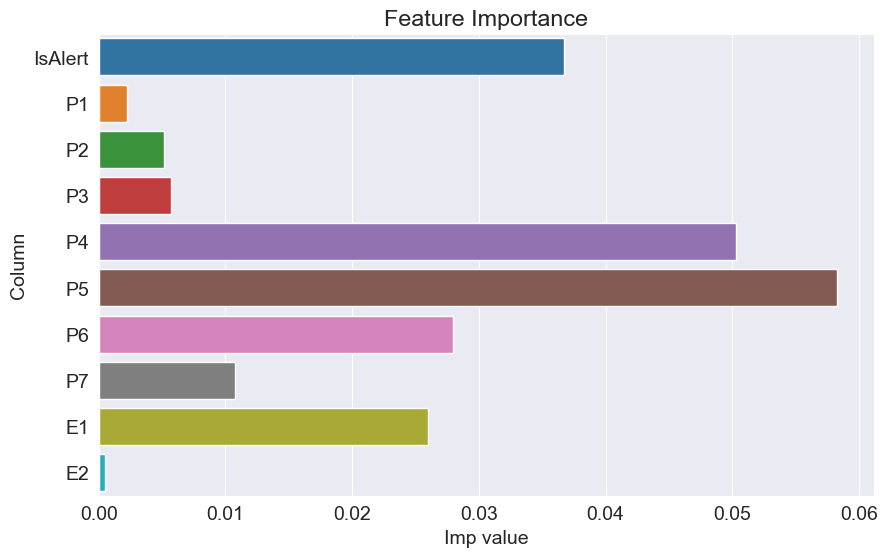

In [49]:
plt.title('Feature Importance')
sns.barplot(data=sample.head(10), x='Imp value', y='Column');

-----------

As we can see from the `sample` Dataframe as well as plot some of the features are contributing a negligible amount of importance to the model,  
ie in the range of 0.00.  
Such variables can be considered for elimination as a part of `Dimensionality reduction techniques`.  

As with any model lesser the number of Dimensions less complex in the model.    
therefore lets try to build a model after eliminating these features.  

In [50]:
train_df_rev.drop(columns=['V1','V2','V4','V8','P1','P2','P3','E2','E10'],inplace=True)

In [51]:
train_df_rev.shape

(604329, 19)

### *Creating X and Y*

In [52]:
X = train_df_rev.values[:,1:]
Y = train_df_rev.values[:,0]

### *Scaling the Data using Standard Scaler*

In [53]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X = scaler.fit_transform(X)
print(X)

[[-1.07334158  0.29996113 -0.10912106 ...  0.46800852  0.55303245
   0.31528007]
 [-1.07334158  0.29996113 -0.10912106 ...  0.47124385  0.55303245
   0.31251192]
 [-1.07334158  0.29996113 -0.10752447 ...  0.4777145   0.55303245
   0.31258238]
 ...
 [ 0.5536582  -0.26105245 -0.06601302 ...  0.13638773  0.55303245
   0.41710791]
 [ 0.5536582  -0.26105245 -0.06601302 ...  0.13638773  0.55303245
   0.41861782]
 [ 0.5536582  -0.26105245 -0.06601302 ...  0.13638773  0.55303245
   0.41861782]]


In [54]:
Y = Y.astype(int)
print(Y)

[0 0 0 ... 1 1 1]


### *Splitting the Data into Training and Validation(Testing data)*

In [55]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.3,random_state=10)

### *Random Forest Classifier model* (with eliminated variables)

In [56]:
# prediciting using Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier

model_RandomForest = RandomForestClassifier(n_estimators=100,
                                            random_state=10,
                                            bootstrap=True,
                                            n_jobs=-1)

# fit the model on the data and predict the values
model_RandomForest.fit(X_train,Y_train)
Y_pred = model_RandomForest.predict(X_test)
# print(Y_pred)
# print(list(zip(Y_test,Y_pred)))

### *Evaluating the model*

In [57]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report

cfm = confusion_matrix(Y_test,Y_pred)
print(cfm)

print("Classification report: ")

print(classification_report(Y_test,Y_pred))

acc = accuracy_score(Y_test,Y_pred)
print("Accuracy of the model: ",acc)

[[ 75560    801]
 [   168 104770]]
Classification report: 
              precision    recall  f1-score   support

           0       1.00      0.99      0.99     76361
           1       0.99      1.00      1.00    104938

    accuracy                           0.99    181299
   macro avg       1.00      0.99      0.99    181299
weighted avg       0.99      0.99      0.99    181299

Accuracy of the model:  0.9946552380322009


As we can see from the above metrics, eliminating those variables did not cause any problems with the accuracy of the model,   
hence we were able reduce the complexity of the model in therms of the dependent variables.  
We have successfully reduced the number of variables from 28 to 19.  

-------------

### *Models and their accuracies*

In [58]:
accuracies = {"Base Logistic Regression": '0.7899 (78.99 %)',
            'SGD Classifier Model':'0.7873 (78.73 %)',
            'K-Fold':'0.7904 (79.04 %)',
            'Stratified K-Fold':'0.7905 (79.05 %)',
            'K Neighbours Classifier Model':'0.9471 (94.71 %)',
            'Decision Tree Model.':'0.9849 (98.49 %)',
            'Extra Trees Model':'0.9906 (99.06 %)',
            'Random Forest Model':'0.9929 (99.29 %)',
            'Ada Boost':'0.9852 (98.52 %)',
            'Gradient Boost':'0.8915 (89.15 %)',
            'XG Boost':'0.9535 (89.15 %)'}

In [59]:
accuracy_df = pd.DataFrame(list(accuracies.items()))
accuracy_df.columns = ['Models','Accuracies']
accuracy_df

,Models,Accuracies
0,Base Logistic Regression,0.7899 (78.99 %)
1,SGD Classifier Model,0.7873 (78.73 %)
2,K-Fold,0.7904 (79.04 %)
3,Stratified K-Fold,0.7905 (79.05 %)
4,K Neighbours Classifier Model,0.9471 (94.71 %)
5,Decision Tree Model.,0.9849 (98.49 %)
6,Extra Trees Model,0.9906 (99.06 %)
7,Random Forest Model,0.9929 (99.29 %)
8,Ada Boost,0.9852 (98.52 %)
9,Gradient Boost,0.8915 (89.15 %)


As we can see from the accuracies Dataframe `Random Forest Classifier Model` gave us the highest accuracy (0.9929 ie. 99.29%) out of all the models.  
So lets use the model to make predictions on some unseen test data.

----------

In [60]:
test_df_rev

,P1,P2,P3,P4,P5,P6,P7,E1,E2,E3,E4,E5,E6,E7,E8,E9,E10,E11,V1,V2,V3,V4,V5,V6,V8,V10,V11
0,38.4294,10.94350,1000,60.0000,0.302277,508,118.1100,0.000,0.000,4,4,0.015434,328,1,1,1,64,0.0,108.57,0.00,255,4.50625,0,2127,17.6,4,16.1937
1,38.3609,15.32120,1000,60.0000,0.302277,508,118.1100,0.000,0.000,4,4,0.015434,328,1,1,1,64,0.0,108.57,0.00,255,4.50625,0,2127,17.6,4,16.1744
2,38.2342,11.51400,1000,60.0000,0.302277,508,118.1100,0.000,0.000,4,8,0.015938,328,1,1,1,65,0.0,108.65,0.07,255,4.50625,0,2131,17.6,4,16.1602
3,37.9304,12.26150,1000,60.0000,0.302277,508,118.1100,0.000,0.000,4,8,0.015938,328,1,1,1,65,0.0,108.65,0.07,255,4.50625,0,2131,17.6,4,16.1725
4,37.8085,12.36660,1000,60.0000,0.302277,504,119.0480,0.000,0.000,4,8,0.015938,328,1,1,1,65,0.0,108.57,0.00,255,4.50625,0,2136,17.6,4,16.1459
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120835,37.3798,17.40260,892,67.2646,0.131030,752,79.7872,0.068,214.033,0,0,0.015875,366,0,0,1,71,0.0,0.00,-0.07,255,0.00000,0,658,0.0,1,16.6850
120836,37.1653,5.37419,892,67.2646,0.131030,752,79.7872,0.068,214.033,0,0,0.015875,366,0,0,1,71,0.0,0.00,-0.07,255,0.00000,0,657,0.0,1,16.6840
120837,36.9131,9.26657,892,67.2646,0.131030,752,79.7872,0.068,214.033,0,0,0.015875,366,0,0,1,71,0.0,0.00,-0.07,255,0.00000,0,655,0.0,1,16.6487
120838,36.6297,10.41710,892,67.2646,0.131030,752,79.7872,0.068,214.033,0,0,0.015875,366,0,0,1,71,0.0,0.00,-0.07,240,0.00000,0,657,0.0,1,16.6314


### *Performing the pre-processing steps on the test data*

In [61]:
test_df_rev.drop(columns=['V1','V2','V4','V8','P1','P2','P3','E2','E10'],inplace=True)

### *Scaling the testing Data*

In [62]:
scaled_test_df = scaler.transform(test_df_rev)

### *Making Predictions on the basis of unseen testing data*

In [63]:
test_pred = model_RandomForest.predict(scaled_test_df)
test_pred

array([1, 1, 1, ..., 1, 1, 1])

### *Saving the models predictions to the testing data*

In [64]:
test_df_rev["Model_Predicitions"] = test_pred

In [65]:
test_df_rev

,P4,P5,P6,P7,E1,E3,E4,E5,E6,E7,E8,E9,E11,V3,V5,V6,V10,V11,Model_Predicitions
0,60.0000,0.302277,508,118.1100,0.000,4,4,0.015434,328,1,1,1,0.0,255,0,2127,4,16.1937,1
1,60.0000,0.302277,508,118.1100,0.000,4,4,0.015434,328,1,1,1,0.0,255,0,2127,4,16.1744,1
2,60.0000,0.302277,508,118.1100,0.000,4,8,0.015938,328,1,1,1,0.0,255,0,2131,4,16.1602,1
3,60.0000,0.302277,508,118.1100,0.000,4,8,0.015938,328,1,1,1,0.0,255,0,2131,4,16.1725,1
4,60.0000,0.302277,504,119.0480,0.000,4,8,0.015938,328,1,1,1,0.0,255,0,2136,4,16.1459,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120835,67.2646,0.131030,752,79.7872,0.068,0,0,0.015875,366,0,0,1,0.0,255,0,658,1,16.6850,1
120836,67.2646,0.131030,752,79.7872,0.068,0,0,0.015875,366,0,0,1,0.0,255,0,657,1,16.6840,1
120837,67.2646,0.131030,752,79.7872,0.068,0,0,0.015875,366,0,0,1,0.0,255,0,655,1,16.6487,1
120838,67.2646,0.131030,752,79.7872,0.068,0,0,0.015875,366,0,0,1,0.0,240,0,657,1,16.6314,1


### *Replacing the Encoded value of the predictions with the actual values*

In [66]:
test_df_rev["Is_Alert"] = test_df_rev.Model_Predicitions.replace({1:"Is Alert",0:"Is Not Alert"})

In [67]:
test_df_rev

,P4,P5,P6,P7,E1,E3,E4,E5,E6,E7,E8,E9,E11,V3,V5,V6,V10,V11,Model_Predicitions,Is_Alert
0,60.0000,0.302277,508,118.1100,0.000,4,4,0.015434,328,1,1,1,0.0,255,0,2127,4,16.1937,1,Is Alert
1,60.0000,0.302277,508,118.1100,0.000,4,4,0.015434,328,1,1,1,0.0,255,0,2127,4,16.1744,1,Is Alert
2,60.0000,0.302277,508,118.1100,0.000,4,8,0.015938,328,1,1,1,0.0,255,0,2131,4,16.1602,1,Is Alert
3,60.0000,0.302277,508,118.1100,0.000,4,8,0.015938,328,1,1,1,0.0,255,0,2131,4,16.1725,1,Is Alert
4,60.0000,0.302277,504,119.0480,0.000,4,8,0.015938,328,1,1,1,0.0,255,0,2136,4,16.1459,1,Is Alert
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120835,67.2646,0.131030,752,79.7872,0.068,0,0,0.015875,366,0,0,1,0.0,255,0,658,1,16.6850,1,Is Alert
120836,67.2646,0.131030,752,79.7872,0.068,0,0,0.015875,366,0,0,1,0.0,255,0,657,1,16.6840,1,Is Alert
120837,67.2646,0.131030,752,79.7872,0.068,0,0,0.015875,366,0,0,1,0.0,255,0,655,1,16.6487,1,Is Alert
120838,67.2646,0.131030,752,79.7872,0.068,0,0,0.015875,366,0,0,1,0.0,240,0,657,1,16.6314,1,Is Alert


### *Saving the predictions to a file*

In [68]:
# determining the name of the file
file_name = 'Final Predictions.csv'
  
# saving the excel
test_df_rev.to_csv(file_name)

------------
### *Conclusion*

In this project we performed the following steps :-  

* Reading in the real world Data.  
* Impoerting the required libraries for basic EDA.  
* Checking for the null values.  
* Performing appropriate feature selection techniques.  
* Splitting the data into training and validation.  
* Building and evaluating different models on the data.  
* Tuning the huper parameters of the model to improve the accuracy of the predictions.  
* Performed Dimensionality reduction techniques to reduce the complexity of the model.  
* Making predictions on the unseen data using the best model that we built.  

-----------

### *References and Future work*

Link to the dataset :
  
https://www.kaggle.com/competitions/stayalert/data   

Check out the following resources to learn more:

https://scikit-learn.org/stable/modules/tree.html  
https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html  
https://www.kaggle.com/willkoehrsen/start-here-a-gentle-introduction  
https://www.kaggle.com/willkoehrsen/introduction-to-manual-feature-engineering  
https://www.kaggle.com/willkoehrsen/intro-to-model-tuning-grid-and-random-search  

*Future work*

* Hyperparameters can be tuned using Grid search CV for a more accurate combination of parameters for the less accurate models.